In [17]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import itertools
import torch
import random
import time
import os
import gym
import tqdm

# import Koopman Libraries
from core.koopman_core_linear import KoopDNN_linear, KoopmanNet_linear, KoopmanNetCtrl_linear
from sklearn import preprocessing
from core.util import fit_standardizer
from models.koop_model import model_matricies,lift

# drone_dynamics
from dynamics.quadsim_2d import QuadSim

In [18]:
# quad pars #
quad_params = {}
quad_params['m'] = 0.8
quad_params["g"] = 9.81
quad_params["L"] = 0.5
quad_params['Ixx'] = quad_params['m']*(quad_params["L"]**2)/12 #1
quad_params['Ixx']

0.016666666666666666

In [19]:
env = QuadSim(quad_params)

# Train


# data generation parameters
dt = env.dt
num_traj = 50
num_snaps = 200*3 #1000-> 5sec of data ... (1000/200)
num_states = 6
num_inputs = 2
T = np.linspace(0,num_snaps*dt,num_snaps+1)

10.127270401008975


In [21]:
X = np.empty((num_traj,num_snaps+1,num_states)) # cartesian state matrix
X_des = np.empty((num_traj,num_snaps,num_states)) # cartesian state matrix
U = np.empty((num_traj,num_snaps,num_inputs)) # input matrix
curr_state = []
# curr_state_noise = []
des_state = []
action_plt = []
for i in tqdm.tqdm(range(num_traj)):
    obs = env.reset()
    done = False
    
    # with open("/home/rajpal/koopman/linear_drone_koopman/Trajectory/traj_{}.csv".format(i+1), "w") as f:
    #     f.write("t,x,y,z,roll,pitch,yaw,vx,vy,vz,roll_rate,pitch_rate,yaw_rate,U,Mx,My,Mz\n")
         # X[i,0,:] = env.Quadrotor.get_state()
#         print(X[i,0,0],X[i,0,1],X[i,0,2],X[i,0,3],X[i,0,4],X[i,0,5],X[i,0,6],X[i,0,7],X[i,0,8],X[i,0,9],X[i,0,10],X[i,0,11])
        # f.write("{},{},{},{},{},{},{},{},{},{},{},{},{}\n".format(env.t, X[i,0,0], X[i,0,1], X[i,0,2], X[i,0,3], X[i,0,4], X[i,0,5], X[i,0,6], X[i,0,7], X[i,0,8], X[i,0,9], X[i,0,10], X[i,0,11]))

    for j in range(num_snaps):
        action = env.action_space.sample()
        #env.render()\n",  
        #action, _states = model.predict(obs)
#             U[i,j,:] = action[0], action[1]
        obs, reward, done, info = env.step(action)
        if j == 0:
            X[i,j,:] = env.Quadrotor.get_state()
        des_state = env.get_des_state()
        # curr_state.append(state)
        # curr_state_noise.append(state)
        # des_state.append(env.get_des_state())
        action_plt.append(env.get_action())
        # #print(action)\n",
        # print(env.get_action().reshape(-1))
        U[i,j,:] = env.get_thr_input()#.reshape(-1)
        X[i,j+1,:] = env.Quadrotor.get_state()
        X_des[i,j,:] = des_state[1:7]
        # f.write("{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}\n".format(env.t, X[i,j+1,0], X[i,j+1,1], X[i,j+1,2], X[i,j+1,3], X[i,j+1,4], X[i,j+1,5], X[i,j+1,6], X[i,j+1,7], X[i,j+1,8], X[i,j+1,9], X[i,j+1,10], X[i,j+1,11], U[i,j,0], U[i,j,1], U[i,j,2], U[i,j,3]))
        #plot_act.append(f)
        #print(reward)
        #plot_ep.append(episode)\n",
    #print(\"Episode - {} Score - {}\".format(episode, score))\n",


100%|█████████████████████████████████████████| 100/100 [01:19<00:00,  1.26it/s]


In [22]:
import random
j = random.choice(range(num_traj))
label_list = ["y", "z", "yaw", "y_dot", "z_dot", "yaw_dot"]

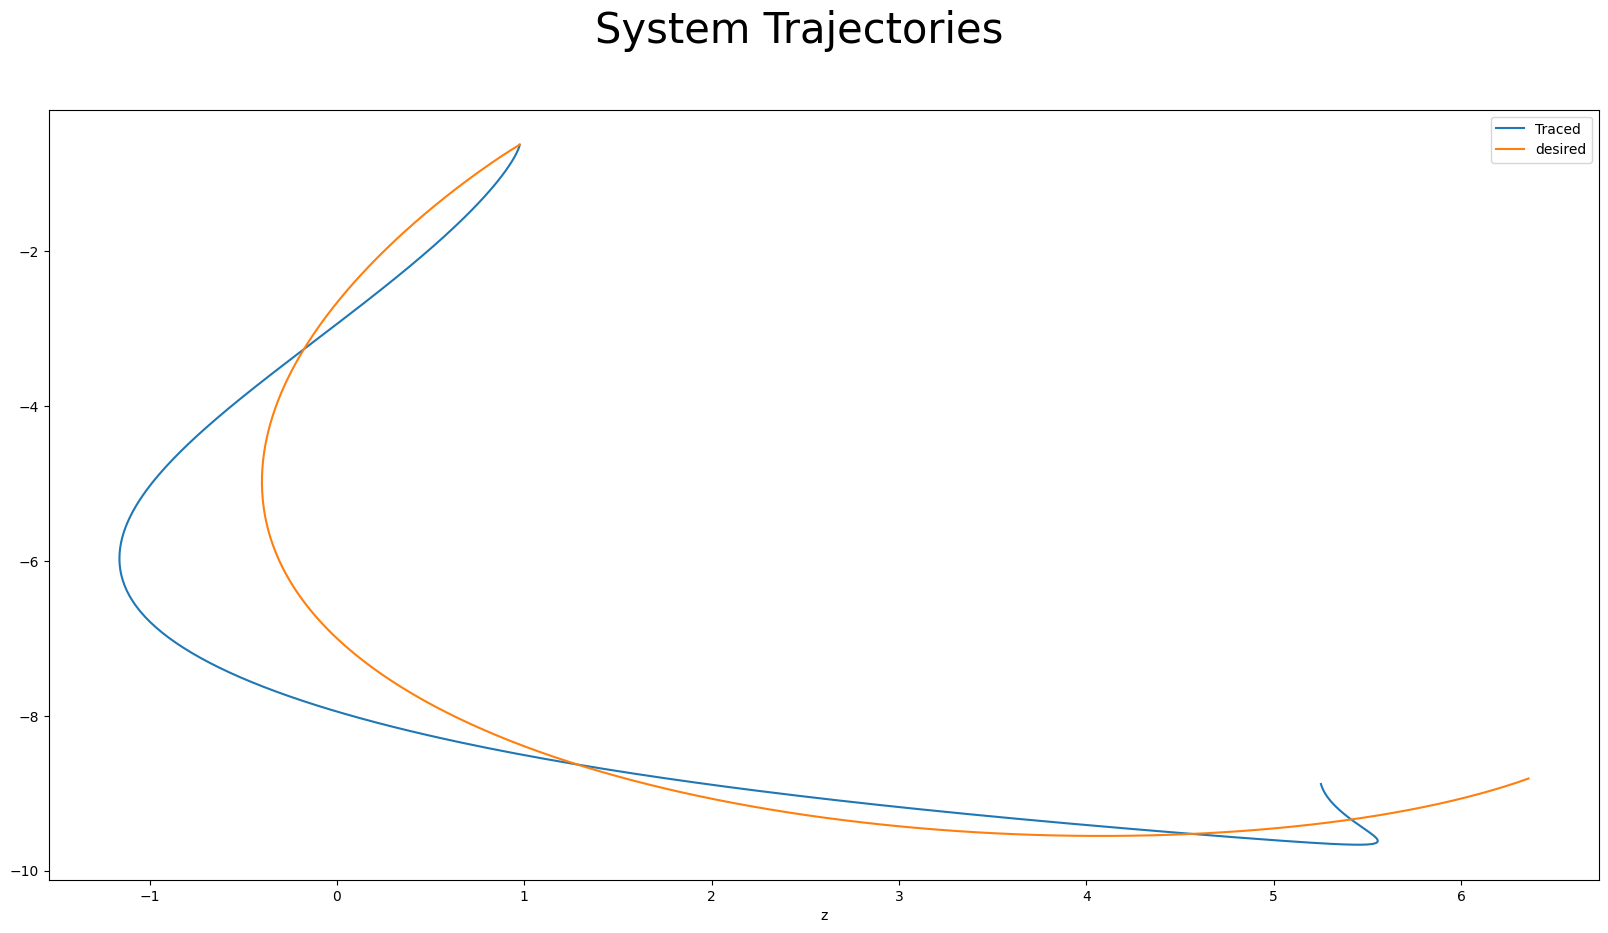

In [23]:
plt.figure(figsize = (20,10))
plt.plot(X[j,:,0], X[j,:,1], label = 'Traced')
plt.plot(X_des[j,:,0], X_des[j,:,1], label = 'desired')
plt.xlabel("y")
plt.xlabel("z")
plt.suptitle("System Trajectories", fontsize=30)
plt.legend()

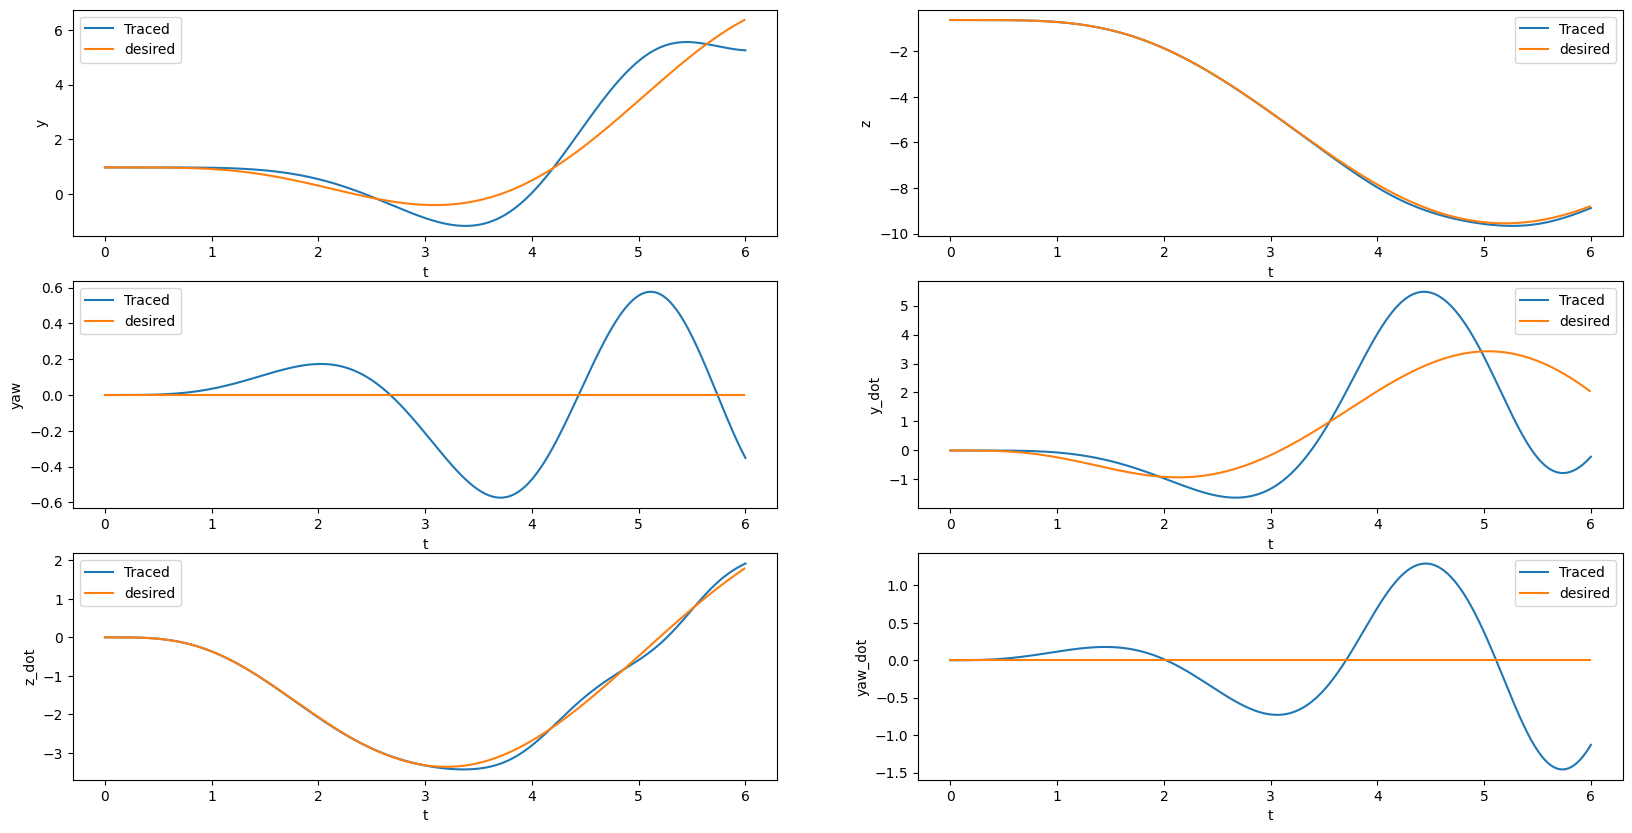

In [24]:
plt.figure(figsize = (20,10))
for i in range(int(num_states)):
    plt.subplot(3,2,i+1)
    plt.xlabel("t")
    plt.ylabel(label_list[i])
    plt.plot(T,X[j,:,i], label = 'Traced')
    plt.plot(T[:-1],X_des[j,:,i], label = 'desired')
    plt.legend()

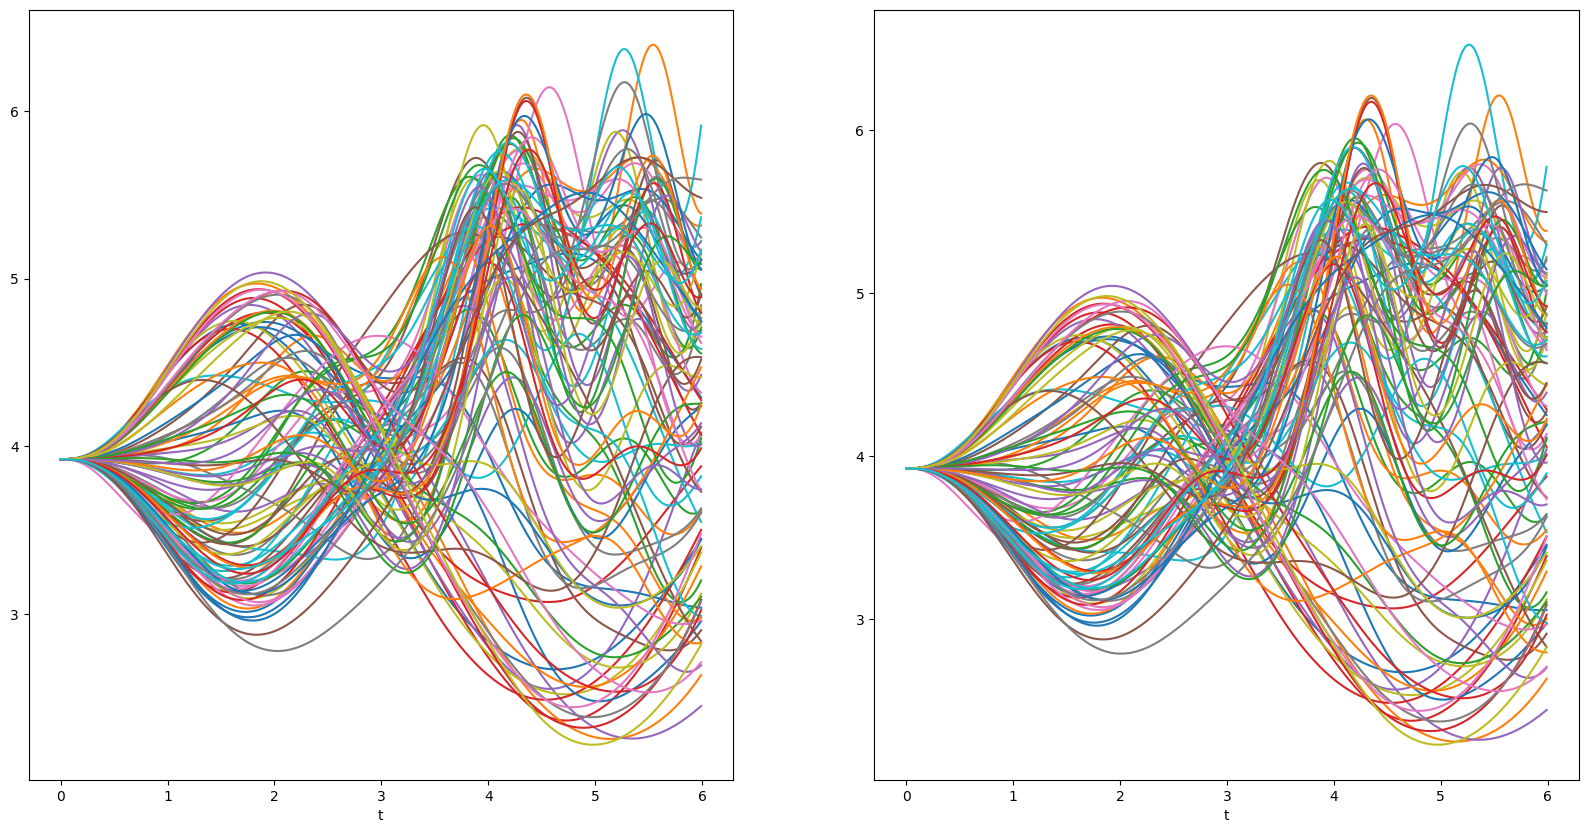

In [25]:
plt.figure(figsize = (20,10))
for j in range(num_traj):
    for i in range(int(num_inputs)):
        plt.subplot(1,2,i+1)
        plt.xlabel("t")
        plt.plot(T[:-1],U[j,:,i], label = 'Traced')